## Análisis de Datos con `pandas`

Para el análisis de datos del proyecto *What does happiness look like?*, utilizaremos la librería `pandas`, una herramienta de Python que permite explotar datos organizados en tablas. En nuestro caso, la plataforma `getinput` generó un archivo **CSV**, por lo que esta librería nos ayudará a procesar la información para identificar patrones en las respuestas del formulario. 

Ademá,  `pandas` nos ayudará con la respresentación gráfica de los datos, lo que facilitará la comprensión de los resultados y la extracción de conclusiones.  

In [151]:
import pandas as pd
import os

# Nombre y ruta del archivo
ruta = r"C:\Users\julia\Desktop\Master Elisava\Data\WDH\02_Analisis"
nombre_archivo = "Resultados_v1_raw.csv"

# Leemos el CSV y mostramos las 5 primeras filas para comprobar que funciona
file = pd.read_csv(nombre_archivo, sep = ',')
file.head(5)

,uid,form,started_at,completed_at,params,wm5R,vowX,kZK5,mQ6O,nrXR,oQKj,pQK2
0,kKanc7rAFEADxDAPhcMTZk65IM8xIRM9,jYM4,2025-01-23 19:11:44,2025-01-23 19:15:06,[],IMG_6827.jpeg,2024-10-10,Bcn,Mujer/ Female,18-30 años/ years old,No,NaN
1,m9rqIETY7IbY3Ey71oDogQjPWxUtuUPt,jYM4,2025-01-23 19:11:58,2025-01-23 19:16:36,[],IMG_0225.jpeg,2024-12-31,Madrid,Mujer/ Female,18-30 años/ years old,Si/ yes,Porque estoy acompañada de personas a las que ...
2,m6RBcnPv7l76wD4ZULVyQ569pgpMuuWH,jYM4,2025-01-23 19:22:04,2025-01-23 19:31:48,[],IMG_0494.jpeg,2024-08-16,Girona,Mujer/ Female,18-30 años/ years old,Si/ yes,"Es una foto muy de friends for life, tumbados ..."
3,js08G8NIz9jXcGksigsg3C2101S16aoh,jYM4,2025-01-23 19:29:58,2025-01-23 19:34:07,[],IMG_2107.jpeg,2024-07-29,"Fornells, Menorca",Hombre/ Male,18-30 años/ years old,Si/ yes,"Amigos, fiesta, Menorca"
4,DJOLn3Lb7XgZWGxbZG3znYtxcglxXZ4i,jYM4,2025-01-23 19:37:24,2025-01-23 19:41:16,[],IMG-20241120-WA0116.jpg,2024-11-12,Madrid-Wizink Center,Mujer/ Female,18-30 años/ years old,No,Sum 41 ha sido siempre uno de mis grupos favor...


In [152]:
# Vamos a analizar las columnas que hay con el objetivo de descartar aquellas que no 
# nos aporten información, y renombrar las que sí, para faciliatr la lectura y análisis 

file.columns

Index(['uid', 'form', 'started_at', 'completed_at', 'params', 'wm5R', 'vowX',
       'kZK5', 'mQ6O', 'nrXR', 'oQKj', 'pQK2'],
      dtype='object')

## Modificaciones en las columnas

Para simplificar el análisis de datos, vamos a reescribir y eliminar algunas columnas de nuestra base de datos:

1. `uid` → Contiene el identificador de sesión del usuario. Nos quedamos con los primeros 7 caracteres.
2. `started_at` → Indica la fecha en que se completó el formulario. La usamos para ordenar cronológicamente.
3.  `wm5R` → hace referencia al nombre del archivo. Le cambiaremos el nombre a `Imagen_Nombre`
4. `vowX` → es la fecha en la que se tomó la foto. Le cambiaremos el nombre a `Imagen_Fecha`
5. `kZK5` → informa del lugar donde se tomó la foto. Le cambiaremos el nombre a `Imagen_Lugar`
6. `mQ6O` y `nrXR`→ Representan el género y la edad del usuario, respectivamente.
8. La columna `oQKj` indica la respuesta a si la foto fue tomada durante un viaje. La cambiaremos por `Viaje`
9. Finalmente, la última columna (`pQK2`) es la descripción del momento feliz. Lo modificaremos por `Motivo`

Las columnas `form`, `completed_at` y `params` serán eliminadas.  

In [153]:
# 1. Ordenamos según el orden cronológico de las respuestas

if "started_at" in file.columns:
    file["started_at"] = pd.to_datetime(file["started_at"])  # Convertir a formato fecha
    file = file.sort_values(by="started_at")

# 2. Modificar la columna `uid` para quedarse solo con los primeros 7 caracteres
file["uid"] = file["uid"].astype(str).str[:7]

# 3. Modificamos nombres de columnas y guardamos como `file_v2`
file_v2 = file.rename(columns={
    "wm5R": "Imagen_Nombre",
    "started_at" : "Fecha",
    "vowX": "Imagen_Fecha",
    "kZK5": "Imagen_Lugar",
    "mQ6O": "Género",
    "nrXR": "Edad",
    "oQKj": "Viaje",
    "pQK2": "Motivo"
})

# file_v2.head(1) 

# 4. Eliminamos columnas no necesarias y guardamos como `file_v3`
columnas_a_eliminar = ["form", "completed_at", "params"]
file_v3 = file_v2.drop(columns=columnas_a_eliminar)

file_v3.head(5) 

,uid,Fecha,Imagen_Nombre,Imagen_Fecha,Imagen_Lugar,Género,Edad,Viaje,Motivo
0,kKanc7r,2025-01-23 19:11:44,IMG_6827.jpeg,2024-10-10,Bcn,Mujer/ Female,18-30 años/ years old,No,NaN
1,m9rqIET,2025-01-23 19:11:58,IMG_0225.jpeg,2024-12-31,Madrid,Mujer/ Female,18-30 años/ years old,Si/ yes,Porque estoy acompañada de personas a las que ...
2,m6RBcnP,2025-01-23 19:22:04,IMG_0494.jpeg,2024-08-16,Girona,Mujer/ Female,18-30 años/ years old,Si/ yes,"Es una foto muy de friends for life, tumbados ..."
3,js08G8N,2025-01-23 19:29:58,IMG_2107.jpeg,2024-07-29,"Fornells, Menorca",Hombre/ Male,18-30 años/ years old,Si/ yes,"Amigos, fiesta, Menorca"
4,DJOLn3L,2025-01-23 19:37:24,IMG-20241120-WA0116.jpg,2024-11-12,Madrid-Wizink Center,Mujer/ Female,18-30 años/ years old,No,Sum 41 ha sido siempre uno de mis grupos favor...


## Modificaciones en las respuestas

Para simplificar el análisis de datos, vamos a **simplificar** algunas de las respuestas:
- `Género` → Unificamos todas las variantes a _Hombre_ o _Mujer_.
- `Viaje` → Convertimos las respuestas (_Yes/No, Sí/No_) en un formato estándar.
- `Ubicación` → Estandarizamos las categorías _Interior_ y _Exterior_.


In [154]:
# 5. Cambiamos respuesta GÉNERO
file_v4 = file_v3.copy()

if "Género" in file_v4.columns:

    # Reemplazar valores variados por "mujer" y "hombre"
    file_v4["Género"] = file_v4["Género"].replace({
    "Mujer/ Female": "Mujer",
    "Hombre/ Male": "Hombre"
    })

if "Viaje" in file_v4.columns:

    # Reemplazar valores 
    file_v4["Viaje"] = file_v4["Viaje"].replace({
    "Si/ yes": "Si",
    })

if "Edad" in file_v4.columns:

    # Reemplazar valores variados por "mujer" y "hombre"
    file_v4["Edad"] = file_v4["Edad"].replace({
    "Menor de 18 años/ less than18 years old": "0-18",
    "18-30 años/ years old": "18-30",
    "30-50 años/ years old": "30-50",
    "Más de 50 años/ over 50 years old": "50-8"
    })

file_v4.head(5) 

,uid,Fecha,Imagen_Nombre,Imagen_Fecha,Imagen_Lugar,Género,Edad,Viaje,Motivo
0,kKanc7r,2025-01-23 19:11:44,IMG_6827.jpeg,2024-10-10,Bcn,Mujer,18-30,No,NaN
1,m9rqIET,2025-01-23 19:11:58,IMG_0225.jpeg,2024-12-31,Madrid,Mujer,18-30,Si,Porque estoy acompañada de personas a las que ...
2,m6RBcnP,2025-01-23 19:22:04,IMG_0494.jpeg,2024-08-16,Girona,Mujer,18-30,Si,"Es una foto muy de friends for life, tumbados ..."
3,js08G8N,2025-01-23 19:29:58,IMG_2107.jpeg,2024-07-29,"Fornells, Menorca",Hombre,18-30,Si,"Amigos, fiesta, Menorca"
4,DJOLn3L,2025-01-23 19:37:24,IMG-20241120-WA0116.jpg,2024-11-12,Madrid-Wizink Center,Mujer,18-30,No,Sum 41 ha sido siempre uno de mis grupos favor...


In [155]:
if "Imagen_Lugar" in file_v4.columns:

    # Reemplazar valores variados 
    file_v4["Imagen_Lugar"] = file_v4["Imagen_Lugar"].replace({
    "Bcn": "Cataluña",
    "Girona": "Cataluña",
    "Hospital Clinic": "Cataluña",
    "Bcn": "Cataluña",
    "barcelona": "Cataluña",
    "Carrer aragó": "Cataluña",
    "Calella": "Cataluña",
    "Sant pol de mar": "Cataluña",
    "Barcelona": "Cataluña",
    "vall de núria": "Cataluña",
    "Cadaqués": "Cataluña",
    "Tavascan (aprox)": "Cataluña",
    "Madrid-Wizink Center": "Madrid",
    "Tres Cantos": "Madrid", 
    "Colmenar Viejo": "Madrid",
    "Paseo de la Castellana, Madrid": "Madrid",
    "Jowke, Madrid": "Madrid",
    "Fornells, Menorca": "Islas Baleares",
    "Menorca": "Islas Baleares",
    "Valparaiso": "Chile",
    "Lago Ranco": "Chile",
    "Portonovo, Pontevedra": "Galicia",
    "Vigo, Pontevedra España": "Galicia",
    "Portonovo, Galicia": "Galicia",
    "Sanxenxo": "Galicia",
    "Portonovo": "Galicia",
    "Isla de la Toja": "Galicia",
    "Feria de Jerez, Cádiz":"Andalucía",
    "Puerto de Santa Maria":"Andalucía",
    "Almería":"Andalucía",
    "Sevilla":"Andalucía",
    "Jávea": "Valencia",
    "València": "Valencia",
    "Cordoba":"Andalucía",
    "Mérida":"Extremadura",
    "Mirabel, Extremadura": "Extremadura",    
    "Béjar":"Castilla y León",
    "Valladolid":"Castilla y León",
    "Valladolid, huerta del rey":"Castilla y León",
    "León":"Castilla y León",
    "Illescas":"Castilla La Mancha",
    "León, Guanajuato. México": "Mexico",
    "Salamanca, Guanajuato": "Mexico",
    "Salamanca, Gto.": "Mexico",
    "Salamanca, Gto": "Mexico",
    "León, Guanajuato. México": "Mexico",
    "Ecatepec Mexico": "Mexico",
    "Alameda, Guanajuato Gto. Mx.": "Mexico",
    "México": "Mexico",
    "Todos santos, BCS": "Mexico",
    "Puerto vallarta": "Mexico",
    "Tijuana,BC": "Mexico",
    "Liverpool": "UK",
    "Bank, London": "UK",    
    "Pavia":"Italia",
    "Spiaggia di Porto Giunco en Cerdeña, Italia":"Italia",
    "Buonconvento, Toscana":"Italia",
    "Jasná, Slovakia":"Eslovaquia",
    "Grindelwald, Suiza":"Suiza",
    "Paxos, Greece":"Grecia",
    "Las Grietas, Lanzarote":"Islas Canarias",
    "Lisboa":"Portugal",
    "Hellasgården, Stockholm":"Estocolmo",
    "Nuku Hiva, marquise islands" :"Polinesia",
    "Japo": "Japón",
    })

In [156]:
# Para analizar todas las variaciones de la respuesta Imagen_Lugar
file_v4["Imagen_Lugar"].unique()

array(['Cataluña', 'Madrid', 'Islas Baleares', 'Andalucía', 'Italia',
       'Chile', 'Valencia', 'Castilla y León', 'Japón', 'Galicia', 'UK',
       'Islas Canarias', 'Portugal', 'Mexico', 'Extremadura', 'Suiza',
       'Grecia', 'Castilla La Mancha', 'Logroño', 'Andorra', 'Polinesia',
       'Paris', 'Neuen', 'Estocolmo', 'Eslovaquia'], dtype=object)

In [157]:
top_lugar_counts = file_v4["Imagen_Lugar"].value_counts().nlargest(3) # lugares
print(top_lugar_counts)

Imagen_Lugar
Cataluña    14
Mexico      10
Madrid       9
Name: count, dtype: int64


## Análisis 

Ahora que hemos refinado nuestra base de datos, procederemos con su análisis.

Para este proceso, exploramos diversas librerías de Python con el objetivo de parametrizar las imágenes y extraer metadatos. Sin embargo, estas herramientas no resultaron útiles por las siguientes razones:

### 1. Parametrización de elementos
Utilizamos el modelo de detección **YOLO** a través de la librería `ultralytics` para identificar objetos en las imágenes y videos. El código correspondiente se encuentra en la siguiente ruta: `Data/WDH/02_Analisis/Parametrizacion Elementos`

**Problema encontrado**: El reconocimiento de objetos no era preciso:
- El recuento de personas resultó incorrecto.
- Se detectaron objetos inexistentes en la imagen (por ejemplo, una cometa fue confundida con una baldosa con forma de rombo).
- Identificaba elementos irrelevantes para nuestra investigación (como un cuchillo).

### 2. Extracción de metadatos
Mediante la librería `piexif`, exploramos los datos **EXIF** de nuestras imágenes. EXIF (*Exchangeable Image File Format*) almacena información como:
- Fecha y hora de captura
- Modelo de cámara
- Coordenadas GPS
- Orientación de la imagen

**Problema encontrado**: Los únicos datos relevantes para nuestra investigación eran la **fecha y el lugar** donde se tomó la foto. Sin embargo, esta información ya era proporcionada por el usuario en el formulario, por lo que decidimos descartar este análisis.


### Análisis manual

Dado que las herramientas automatizadas no resultaron efectivas para el reconocimiento de elementos en las imágenes y los metadatos no aportaban información adicional relevante para nuestra investigación, el análisis se realizó manualmente, centrándonos en categorizar las imágenes según los criterios que se verán a continuación.

Tras revisar las descripciones de todas las imágenes, identificamos que las escenas más recurrentes se relacionaban con:
- **Compañía**: personas en la imagen
- **Viajes**: imágened tomadas en lugares diferentes al de residencia
- **Logros personales**: momentos de éxito o superación
- **Celebraciones**: fiestas, eventos o reuniones especiales
- **Naturaleza**: imagenes donde predominen paisajes naturales

Con esta información, decidimos extraer los siguientes datos para analizar mejor estas categorías y los patrones:
- `Temática`: Viaje, Logro Personal, Celebración o Naturaleza.
- `Relación`: entre las personas presentes en la imagen.
- `Sonrisa`: Determinar si las personas están sonriendo.
- `Ubicación`: Identificar si la imagen fue tomada en un espacio exterior o interior.
- `Viaje`, si la imagen fue tomada durante un viaje.
- `Color` predominante en la imagen.
- `Selfie`: identificar el formato de la foto.

Como este análisis fue hecho en una hoja de cálculo, vamos a subir el csv y anexarlo a nuestra tabla.

In [158]:
# Leemos el CSV y mostramos las 5 primeras filas para comprobar que funciona


extraColumns = pd.read_csv("ColumnasAdicionales.csv", sep = ',')

extraColumns.head(2)

,Imagen_Nombre,Compania,Naturaleza,Color,Selfie,Ubicacion,Fiesta,Logro,Sonrisas
0,20241125_174949.jpg,Ninguna,Si,Amarillo,No,Exterior,No,Si,Si
1,IMG_7211.jpeg,Pareja,No,Amarillo,Si,Exterior,No,No,Si


In [159]:
# Las dos tablas (extraColumns y file_v4) tienen un identificador en común: Imagen_Nombre. 
# Tendremos que cruzar las tablas mediante este ID y guardar en un archivo nuevo: file_v5

if "Imagen_Nombre" in file_v4.columns and "Imagen_Nombre" in extraColumns.columns:
    
    # Fusionar las BBDD en base a 'Imagen_Nombre'
    file_v5 = file_v4.merge(extraColumns, on="Imagen_Nombre", how="left")
else:
    # si no encuentra la columna, que nos imprima el error
    print("Error: La columna 'Imagen_Nombre' no se encuentra en uno de los archivos.")


In [160]:
# comprobamos que se hayan fusionado correctamente: 
file_v5.head(1)


,uid,Fecha,Imagen_Nombre,Imagen_Fecha,Imagen_Lugar,Género,Edad,Viaje,Motivo,Compania,Naturaleza,Color,Selfie,Ubicacion,Fiesta,Logro,Sonrisas
0,kKanc7r,2025-01-23 19:11:44,IMG_6827.jpeg,2024-10-10,Cataluña,Mujer,18-30,No,NaN,Amigos,No,Negro,No,Exterior,No,No,Si


In [161]:
file_v5.columns

Index(['uid', 'Fecha', 'Imagen_Nombre', 'Imagen_Fecha', 'Imagen_Lugar',
       'Género', 'Edad', 'Viaje', 'Motivo', 'Compania', 'Naturaleza', 'Color',
       'Selfie', 'Ubicacion', 'Fiesta', 'Logro', 'Sonrisas'],
      dtype='object')

Procedemos a analizar estadísticamente los datos:

In [162]:
## Vamos a evaluar los días de felicidad más repetidos 

# Convertir la columna 'Imagen_Fecha' a formato datetime
file_v5["Imagen_Fecha"] = pd.to_datetime(file_v5["Imagen_Fecha"], errors="coerce")

# Obtener el día de la semana, día del mes y mes más repetido
imagen_dia_semana_mas_repetido = file_v5["Imagen_Fecha"].dt.day_name().mode()[0]
imagen_dia_mes_mas_repetido = file_v5["Imagen_Fecha"].dt.day.mode()[0]
imagen_mes_mas_repetido = file_v5["Imagen_Fecha"].dt.month_name().mode()[0]

# Mostrar los resultados en consola
print("📊 Día, Mes y Semana más repetidos \n")
print(f"- Día de la Semana más repetido: {imagen_dia_semana_mas_repetido}")
print(f"- Día del Mes más repetido: {imagen_dia_mes_mas_repetido}")
print(f"- Mes más repetido: {imagen_mes_mas_repetido}")


📊 Día, Mes y Semana más repetidos 

- Día de la Semana más repetido: Friday
- Día del Mes más repetido: 15
- Mes más repetido: August


In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Recuentos
sonrisas_count = file_v5["Sonrisas"].value_counts() # sonrisas
relaciones_count = file_v5["Compania"].value_counts() # tipos de relación
ubicaciones_count = file_v5["Ubicacion"].value_counts() # interior o exterior
viaje_counts = file_v5["Viaje"].value_counts() # viaje
selfie_counts = file_v5["Selfie"].value_counts() # selfie
naturaleza_counts = file_v5["Naturaleza"].value_counts() # paisajes
lugar_counts = file_v5["Imagen_Lugar"].value_counts() # lugares
tematica_counts = {
    "Viaje": file_v5["Viaje"].value_counts(),
    "Logro Personal": file_v5["Logro"].value_counts(),
    "Celebración": file_v5["Fiesta"].value_counts(),
    "Naturaleza": file_v5["Naturaleza"].value_counts()
}

top_colors = file_v5["Color"].value_counts().nlargest(10)  # los 10 más repetidos 
top_colors_filtered = top_colors[top_colors.index.str.lower() != "ninguno"] # Filtrar para descartar "Ninguno

# Para la visualización, necesitaremos traducir los nombres de los colores, asi que creamos un diccionario ya: 
# pero de momento no la usaremos 

color_translation = {
    "azul": "blue",
    "rojo": "red",
    "verde": "green",
    "amarillo": "yellow",
    "morado": "purple",
    "naranja": "orange",
    "rosa": "pink",
    "negro": "black",
    "blanco": "white",
    "gris": "gray",
    "marrón": "brown"
}

# Imprimir recuento de Sonrisas
print("\n📊 Recuento de fotos con Sonrisas:\n")
print(sonrisas_count)

# Imprimir recuento de Selfies
print("\n📊 Recuento de fotos en formato Selfie:\n")
print(selfie_counts)


📊 Recuento de fotos con Sonrisas:

Sonrisas
Si    56
No    22
Name: count, dtype: int64

📊 Recuento de fotos en formato Selfie:

Selfie
No    56
Si    22
Name: count, dtype: int64


## Visualización de Datos

Procedimos a analizar estadísticamente los datos mediante gráficas y recuentos. La visualización gráfica nos permitió identificar tendencias claras en las imágenes enviadas.

C:\Users\julia\AppData\Local\Temp\ipykernel_3972\361780363.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genero_counts.index, y=genero_counts.values, ax=axes[1], palette="coolwarm")


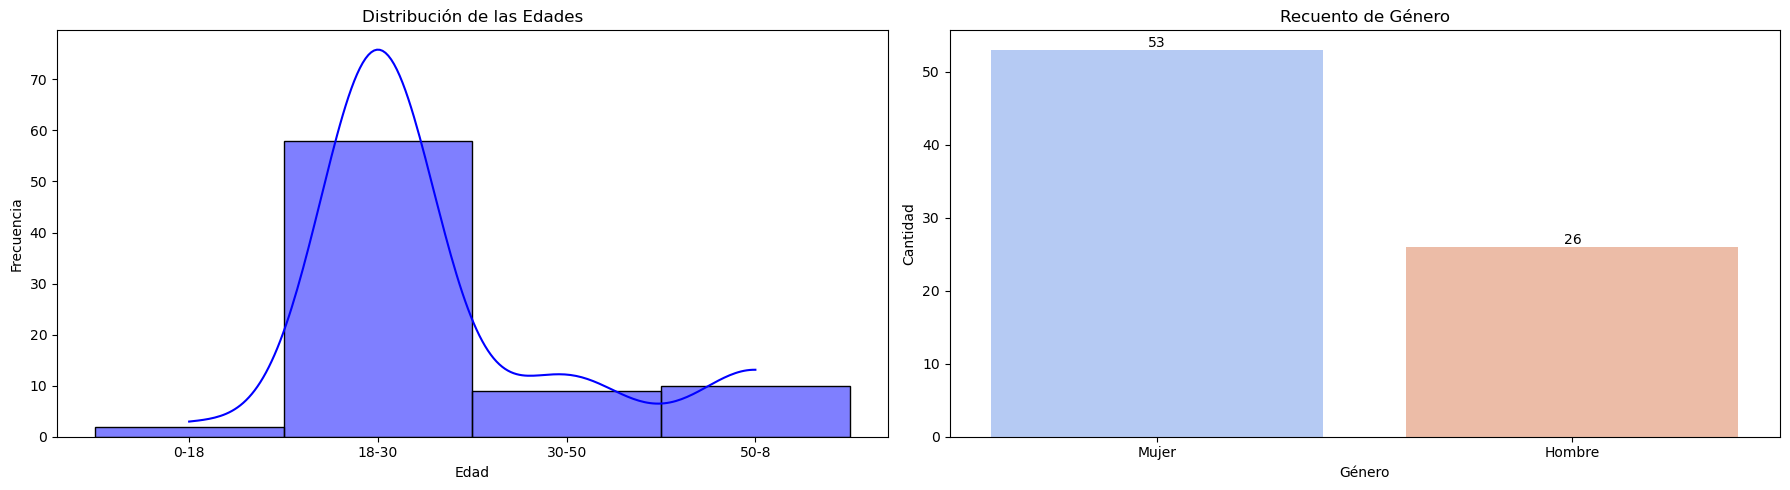

In [164]:
# Configurar los gráficos en una nueva celda
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Gráfico de distribución de edades
file_v5_sorted = file_v5.sort_values(by="Edad")
sns.histplot(file_v5_sorted["Edad"].dropna(), bins=10, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Distribución de las Edades")
axes[0].set_xlabel("Edad")
axes[0].set_ylabel("Frecuencia")

# Gráfico de recuento de Género
genero_counts = file_v5["Género"].value_counts()
sns.barplot(x=genero_counts.index, y=genero_counts.values, ax=axes[1], palette="coolwarm")
axes[1].set_title("Recuento de Género")
axes[1].set_xlabel("Género")
axes[1].set_ylabel("Cantidad")
for i, p in enumerate(axes[1].patches):
    axes[1].annotate(f'{genero_counts.values[i]}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha='center', va='bottom', fontsize=10, color='black')

# Ajustar diseño
plt.tight_layout()
plt.show()


C:\Users\julia\AppData\Local\Temp\ipykernel_3972\190879009.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax0 = sns.barplot(x=top_lugar_counts.index, y=top_lugar_counts.values, ax=axes[0, 0], palette="magma")
C:\Users\julia\AppData\Local\Temp\ipykernel_3972\190879009.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax6 = sns.barplot(x=top_colors_filtered.index, y=top_colors_filtered.values, ax=axes[1, 2], palette=bar_colors)


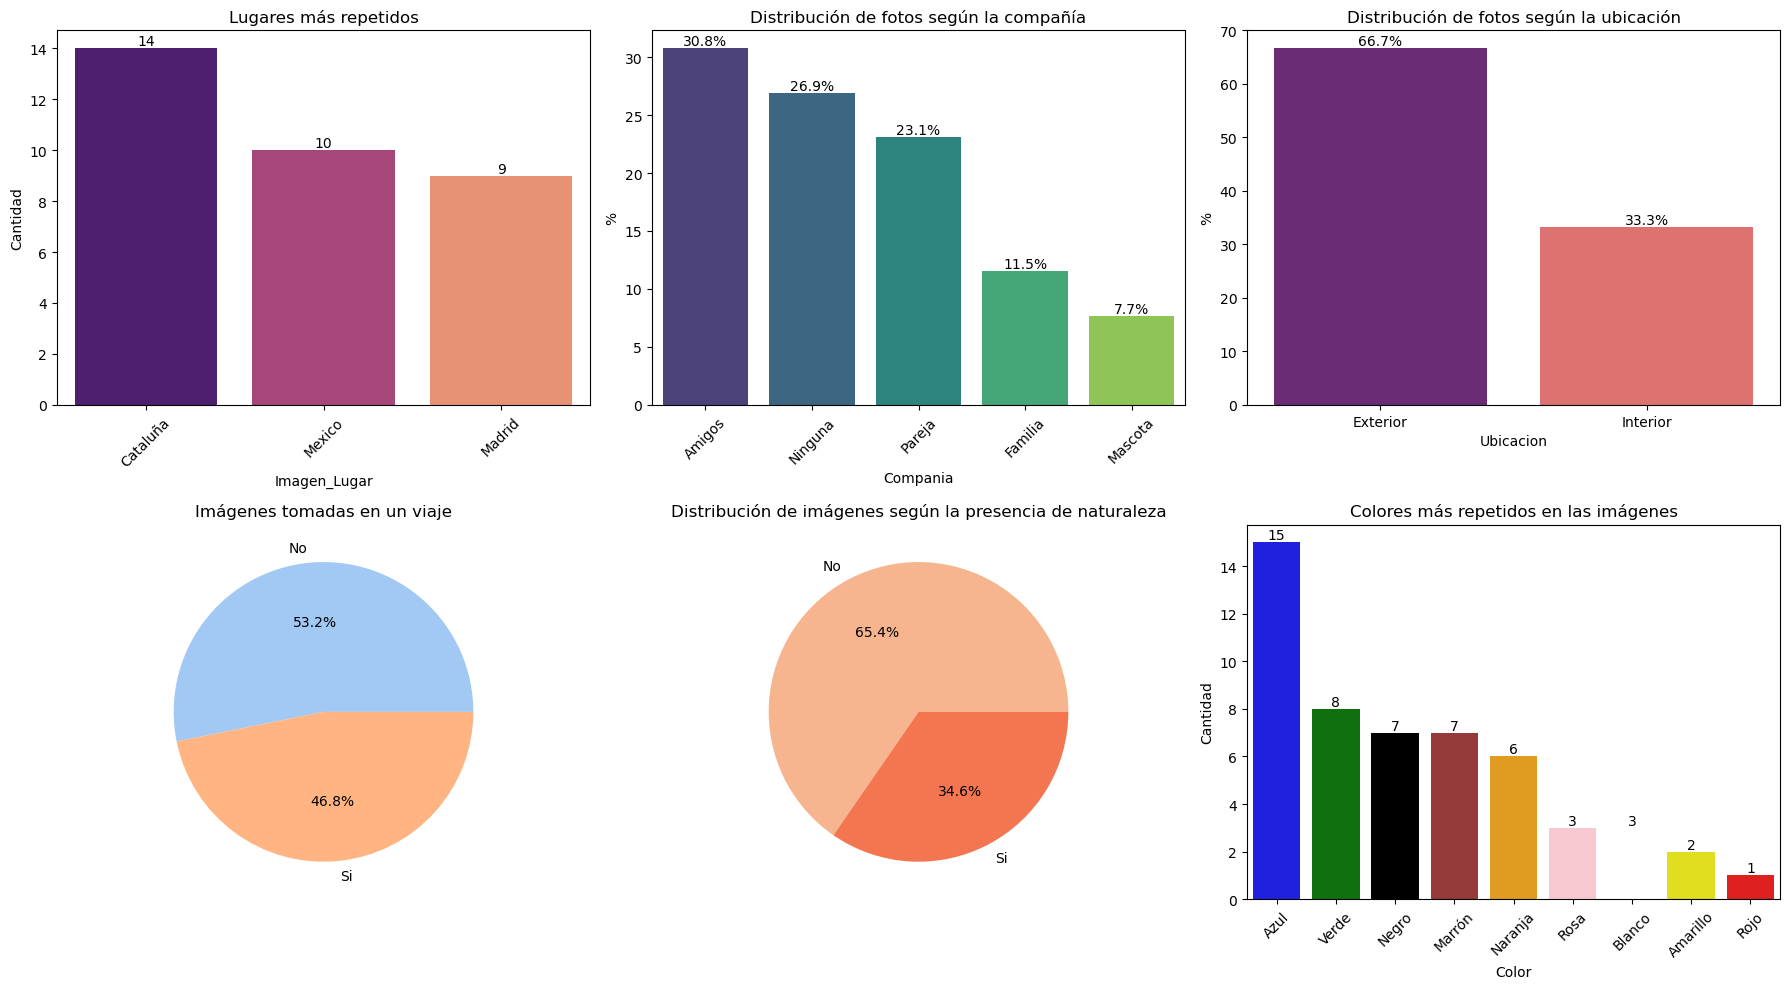

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar los gráficos
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Gráfico de Lugares 
ax0 = sns.barplot(x=top_lugar_counts.index, y=top_lugar_counts.values, ax=axes[0, 0], palette="magma")
axes[0, 0].set_title("Lugares más repetidos")
axes[0, 0].set_ylabel("Cantidad")
axes[0, 0].tick_params(axis='x', rotation=45)
for i, p in enumerate(ax0.patches):
    ax0.annotate(f'{top_lugar_counts.values[i]}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10, color='black')

# Gráfico de Relaciones
total_relaciones = relaciones_count.sum()
relaciones_percent = (relaciones_count / total_relaciones) * 100
ax2 = sns.barplot(x=relaciones_percent.index, y=relaciones_percent.values, hue=relaciones_percent.index, ax=axes[0, 1], palette="viridis", legend=False)
axes[0, 1].set_title("Distribución de fotos según la compañía")
axes[0, 1].set_ylabel("%")
axes[0, 1].tick_params(axis='x', rotation=45)
for i, p in enumerate(ax2.patches):
    ax2.annotate(f'{relaciones_percent.values[i]:.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10, color='black')

# Gráfico de Ubicaciones
total_ubicaciones = ubicaciones_count.sum()
ubicaciones_percent = (ubicaciones_count / total_ubicaciones) * 100
ax3 = sns.barplot(x=ubicaciones_percent.index, y=ubicaciones_percent.values, hue=ubicaciones_percent.index, ax=axes[0, 2], palette="magma", legend=False)
axes[0, 2].set_title("Distribución de fotos según la ubicación")
axes[0, 2].set_ylabel("%")
for i, p in enumerate(ax3.patches):
    ax3.annotate(f'{ubicaciones_percent.values[i]:.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10, color='black')

# Gráfico circular para Viajes
axes[1, 0].pie(viaje_counts, labels=viaje_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
axes[1, 0].set_title("Imágenes tomadas en un viaje")

# Gráfico circular para la naturaleza
axes[1, 1].pie(naturaleza_counts, labels=naturaleza_counts.index, autopct='%1.1f%%', colors=sns.color_palette("rocket_r"))
axes[1, 1].set_title("Distribución de imágenes según la presencia de naturaleza")

# Gráfico de los colores más repetidos 

# Recuperamos el diccionario de colores traducidos y lo aplicamos a top_colors_filtered
bar_colors = [color_translation.get(color.lower(), "gray") for color in top_colors_filtered.index]
ax6 = sns.barplot(x=top_colors_filtered.index, y=top_colors_filtered.values, ax=axes[1, 2], palette=bar_colors)
axes[1, 2].set_title("Colores más repetidos en las imágenes")
axes[1, 2].set_ylabel("Cantidad")
axes[1, 2].tick_params(axis='x', rotation=45)

# Añadir etiquetas con valores
for i, p in enumerate(ax6.patches):
    axes[1, 2].annotate(f'{top_colors_filtered.values[i]}', 
                         (p.get_x() + p.get_width() / 2, p.get_height()), 
                         ha='center', va='bottom', fontsize=10, color='black')

# Ajustar el diseño
plt.tight_layout()
plt.savefig("Stats1.jpg", format="jpg", dpi=300,bbox_inches="tight", pad_inches=0.1)
plt.show()


In [166]:
# GRAFICO TEMATICAS

# este grafico nos ha dado muchos problemas debido a que las variables son un array. No hemos encontrado la manera de resolverlo, 
# asi que vamos a imprimir los counts y a graficarlo de manera "burda"

print(tematica_counts)


{'Viaje': Viaje
No    42
Si    37
Name: count, dtype: int64, 'Logro Personal': Logro
No    56
Si    22
Name: count, dtype: int64, 'Celebración': Fiesta
No    52
Si    26
Name: count, dtype: int64, 'Naturaleza': Naturaleza
No    51
Si    27
Name: count, dtype: int64}


C:\Users\julia\AppData\Local\Temp\ipykernel_3972\1030760060.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(tematica_percent.keys()), y=list(tematica_percent.values()), palette="magma")


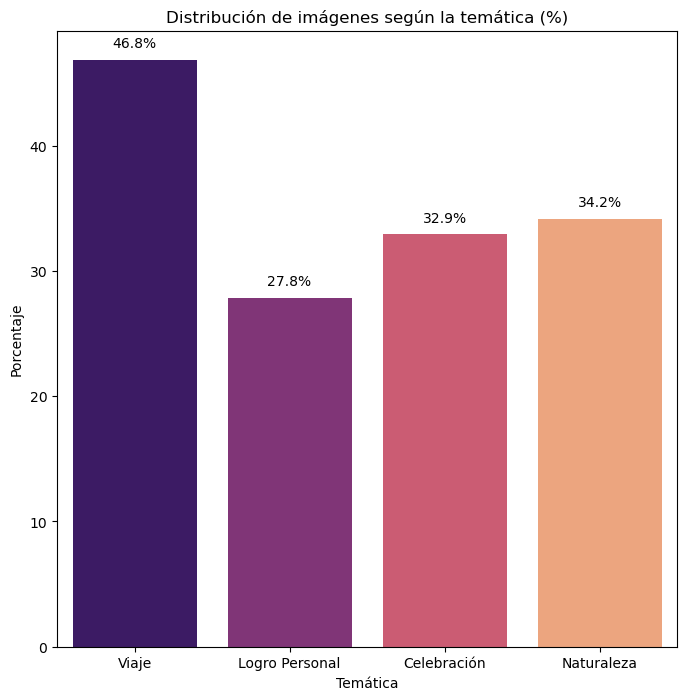

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

# Datos corregidos
tematica_suma = {
    "Viaje": 37,
    "Logro Personal": 22,
    "Celebración": 26,
    "Naturaleza": 27
}
total_respuestas = 79

# Calcular porcentajes
tematica_percent = {key: (value / total_respuestas) * 100 for key, value in tematica_suma.items()}

# Crear gráfico de barras con los porcentajes
plt.figure(figsize=(8, 8))
ax = sns.barplot(x=list(tematica_percent.keys()), y=list(tematica_percent.values()), palette="magma")

# Configurar títulos y etiquetas
plt.title("Distribución de imágenes según la temática (%)")
plt.xlabel("Temática")
plt.ylabel("Porcentaje")

# Añadir etiquetas con los valores corregidos
for i, value in enumerate(tematica_percent.values()):
    ax.text(i, value + 1, f"{value:.1f}%", ha='center', fontsize=10, color='black')

# Guardar la imagen correctamente
plt.savefig("grafico_tematica_corregido.jpg", format="jpg", dpi=300, bbox_inches="tight")

# Mostrar el gráfico
plt.show()

